# Data cleaning
The main purpose of this notebook is to unify structure from different faculties/universities, clean them and merge them into one dataset

In [1]:
import sys
sys.path.append('../utils/')
from parsing import *

import warnings
warnings.filterwarnings("ignore")

In [2]:
PATH_INTERMEDIATE = '../../data/intermediate/'

## 1. Load & clean
Part of this task is also enrichment of datasets.

In [3]:
general_df = pd.DataFrame()

### 1.1. UK

In [4]:
uk_df = load_uk_raw()
# add some features to dataframe
uk_df = enrich_uk(uk_df)
general_df = general_df.append(uk_df)

In [5]:
display(uk_df.shape)
display(uk_df[uk_df.graduated].date_end.min())
uk_df.head()

(32906, 11)

Timestamp('2011-03-17 00:00:00')

,major,date_end,date_start,age_start,relevance_date,university,graduated,year_of_study,birth_date,age_end,age_now
0,Fyziologie a patologická fyziologie,2015-11-27,2011,29,2021-12-17,hkuk,True,NaN,1982,33.0,40
1,Všeobecné lékařství,2011-07-14,2005,23,2021-12-17,hkuk,True,NaN,1982,29.0,40
2,Lékařská mikrobiologie,2014-11-24,2010,38,2021-12-17,hkuk,True,NaN,1972,42.0,50
3,Vnitřní nemoci,NaT,2012,54,2021-12-17,hkuk,False,10.0,1958,NaN,64
4,Lékařská biologie,2016-12-01,2008,34,2021-12-17,hkuk,True,NaN,1974,42.0,48


### 1.2. MUNI

In [6]:
muni_df = load_muni_raw()
# add some features to dataframe
muni_df = enrich_muni(muni_df)
general_df = general_df.append(muni_df)

In [7]:
display(muni_df.shape)
display(muni_df[muni_df.graduated].date_end.min())
muni_df.head()

(12357, 13)

Timestamp('2012-01-02 00:00:00')

,degree,major,date_start,date_end,birth_date,citizenship,university,graduated,year_of_study,age_start,age_end,age_now,relevance_date
0,doktorský,Chirurgie,2005,2012-09-25,1969,Česká republika,muni,True,NaN,36,43.0,53,2022-06-01
1,doktorský,Chirurgie,2003,2012-04-04,1960,Česká republika,muni,True,NaN,43,52.0,62,2022-06-01
2,bakalářský,Zdravotní laborant,2009,2012-06-13,1970,Česká republika,muni,True,NaN,39,42.0,52,2022-06-01
3,doktorský,Lékařská chemie a biochemie,2010,2015-12-08,1972,Česká republika,muni,True,NaN,38,43.0,50,2022-06-01
4,doktorský,Stomatologie,2021,NaT,1968,Česká republika,muni,False,1.0,53,NaN,54,2022-06-01


### 1.3. OVA

In [8]:
ova_df = load_ova_raw()
ova_df['graduated'] = ova_df['year_of_study'].isna()
ova_df['relevance_date'] = pd.to_datetime('20-12-2021')

general_df = general_df.append(ova_df)

In [9]:
display(muni_df.shape)
display(ova_df[ova_df.graduated].date_end.min())
ova_df.head()

(12357, 13)

Timestamp('2016-04-21 00:00:00')

,major,date_end,year_of_study,citizenship,date_start,university,graduated,relevance_date
0,Všeobecné lékařství,2021-05-20 00:00:00,NaN,Česká republika,2015-08-28,ova,True,2021-12-20
1,Všeobecné lékařství,2018-05-22 00:00:00,NaN,Česká republika,2012-08-31,ova,True,2021-12-20
2,Všeobecné lékařství,2019-05-23 00:00:00,NaN,Česká republika,2013-09-05,ova,True,2021-12-20
3,Všeobecné lékařství,2018-05-14 00:00:00,NaN,Česká republika,2012-08-31,ova,True,2021-12-20
4,Všeobecné lékařství,2020-06-19 00:00:00,NaN,Česká republika,2014-08-29,ova,True,2021-12-20


### 1.4. UNOB

In [10]:
unob_df = load_unob_raw()
unob_df = enrich_unob(unob_df)
general_df = general_df.append(unob_df)

In [11]:
display(unob_df.shape)
display(unob_df[unob_df.graduated].date_end.min())
unob_df.head()

(309, 12)

2011

,graduated,age_start,citizenship,major,date_start,university,date_end,relevance_date,birth_date,age_end,age_now,year_of_study
0,True,20,Česká republika,Vojenské všeobecné lékařství,2009,unob,2015,2022-01-17,1989,26,33,NaN
1,True,20,Česká republika,Vojenské všeobecné lékařství,2015,unob,2021,2022-01-17,1995,26,27,NaN
2,True,22,Česká republika,Vojenské všeobecné lékařství,2015,unob,2021,2022-01-17,1993,28,29,NaN
3,False,19,Česká republika,Vojenské všeobecné lékařství,2015,unob,2022,2022-01-17,1996,26,26,7.0
4,True,20,Česká republika,Vojenské všeobecné lékařství,2015,unob,2021,2022-01-17,1995,26,27,NaN


### 1.5. UPOL

In [12]:
upol_df = load_upol_raw()
upol_df = enrich_upol(upol_df)
general_df = general_df.append(upol_df)

In [13]:
display(upol_df.shape)
display(upol_df[upol_df.graduated].date_end.min())
upol_df.head()

(5670, 18)

2011

,date_start,age_start,citizenship,major,major_number,language,permanent_address,study_length,degree,date_end,university,gender,relevance_date,graduated,year_of_study,birth_date,age_end,age_now
0,2011,19,Malajsie,General Medicine,M5103,AJ,Malajsie,6,MUDr.,2017,upol,ženy,2021-09-12,True,NaN,1992,25,30
1,2007,19,Malajsie,Všeobecné lékařství,M5103,AJ,Malajsie,6,MUDr.,2013,upol,ženy,2021-09-12,True,NaN,1988,25,34
2,2006,20,Malajsie,Všeobecné lékařství,M5103,AJ,Malajsie,6,MUDr.,2012,upol,ženy,2021-09-12,True,NaN,1986,26,36
3,2010,18,Malajsie,General Medicine,M5103,AJ,Malajsie,6,MUDr.,2016,upol,ženy,2021-09-12,True,NaN,1992,24,30
4,2007,20,Malajsie,Všeobecné lékařství,M5103,AJ,Malajsie,6,MUDr.,2013,upol,ženy,2021-09-12,True,NaN,1987,26,35


## 2. Unify and clean datasets

In [14]:
display(general_df.info())
general_df.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52219 entries, 0 to 5669
Data columns (total 18 columns):
age_end              32719 non-null float64
age_now              51242 non-null float64
age_start            51242 non-null float64
birth_date           51242 non-null float64
citizenship          19313 non-null object
date_end             33696 non-null object
date_start           52219 non-null object
degree               18026 non-null object
gender               5670 non-null object
graduated            52219 non-null bool
language             5670 non-null object
major                52219 non-null object
major_number         5670 non-null object
permanent_address    5670 non-null object
relevance_date       52219 non-null datetime64[ns]
study_length         5670 non-null float64
university           52219 non-null object
year_of_study        21645 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(6), object(10)
memory usage: 7.2+ MB


None

,age_end,age_now,age_start,birth_date,citizenship,date_end,date_start,degree,gender,graduated,language,major,major_number,permanent_address,relevance_date,study_length,university,year_of_study
0,33.0,40.0,29.0,1982.0,NaN,2015-11-27 00:00:00,2011,NaN,NaN,True,NaN,Fyziologie a patologická fyziologie,NaN,NaN,2021-12-17,NaN,hkuk,NaN
1,29.0,40.0,23.0,1982.0,NaN,2011-07-14 00:00:00,2005,NaN,NaN,True,NaN,Všeobecné lékařství,NaN,NaN,2021-12-17,NaN,hkuk,NaN


### 2.1 Filter out irrelevant majors

In [15]:
# filter non-Mu/MDDr.
# delete non-master programmes
general_df = general_df[general_df.degree.isin(['MUDr.', 'MDDr.', 'magisterský', np.NaN])]

# parse and re-type dates
general_df['date_end'] = (general_df['date_end'].apply(lambda x: str(x)[:4])
                                                .replace({'NaT': np.nan})
                                                .apply(pd.to_numeric))

general_df['date_start'] = (general_df['date_start'].apply(lambda x: str(x)[:4])
                                                    .replace({'NaT': np.nan})
                                                    .apply(pd.to_numeric))

general_df['gender'] = general_df['gender'].replace({'muži':'M',
                                                     'ženy':'F'})


In [16]:
# Relevant majors

# pd.DataFrame(general_df['major'].unique()).to_excel(PATH_INTERMEDIATE+'majors.xlsx')

majors = pd.read_excel(PATH_INTERMEDIATE+'majors.xlsx', index_col=0)
majors = majors[~majors['degree'].isna()]
relevant_df = general_df.merge(majors, on='major', suffixes=('', '_tmp'))


# replace missing values
d_f = (relevant_df.degree.isna() | (relevant_df.degree == 'magisterský'))
relevant_df.loc[d_f, 'degree'] = relevant_df[d_f]['degree_tmp']

l_f = (relevant_df.language.isna())
relevant_df.loc[l_f, 'language'] = relevant_df[l_f]['language_tmp']

y_f = (relevant_df.study_length.isna())
relevant_df.loc[y_f, 'study_length'] = relevant_df[y_f]['study_length_tmp']

relevant_df = relevant_df.drop(columns=[x for x in relevant_df.columns if 'tmp' in x])
relevant_df['language'] = relevant_df['language'].replace({'AJ':'EN'})
relevant_df['university'] = relevant_df['university'].apply(lambda x: x.upper())

### 2.2 Degree duration

In [17]:
# how long did it take to achieve the degree
relevant_df['years_for_degree'] = np.where(relevant_df['graduated'], relevant_df['date_end'] - relevant_df['date_start'], np.nan)
relevant_df['years_extra']  = np.where(relevant_df['degree'] == 'MDDr.', relevant_df['years_for_degree'] - 5, relevant_df['years_for_degree'] - 6)

### 2.3 Unify major names

In [18]:
mudr_f = relevant_df.major.str.contains('Všeobecné') | relevant_df.major.str.contains('General')
relevant_df.loc[mudr_f,'major'] = 'Všeobecné lékařství'
mddr_f = relevant_df.major.str.contains('Zubní') | relevant_df.major.str.contains('Denti')
relevant_df.loc[mddr_f,'major'] = 'Zubní lékařství'

vmudr_f = relevant_df.major.str.contains('všeobecné')
relevant_df.loc[vmudr_f,'major'] = 'Vojenské všeobecné lékařství'
vmddr_f = relevant_df.major.str.contains('zubní')
relevant_df.loc[vmddr_f,'major'] = 'Vojenské zubní lékařství'

### 2.4 Countries

In [19]:
relevant_df['citizenship'] = relevant_df['citizenship'].apply(country_code)
relevant_df['permanent_address'] = relevant_df['permanent_address'].apply(country_code)

In [20]:
relevant_df['dropout'] = np.where(relevant_df['date_end'].isna(), True, False)
display(relevant_df.dropout.value_counts())
relevant_df.loc[(relevant_df.age_end < 23) & (relevant_df.years_extra < 0), 'dropout'] = True
relevant_df = relevant_df[(relevant_df.years_for_degree >= 0) | (relevant_df.years_for_degree.isna())] # nesmyslne zaznamy

False    23116
True     13393
Name: dropout, dtype: int64

In [21]:
display(relevant_df.columns)
sum(relevant_df.years_for_degree.value_counts()) + relevant_df[relevant_df.years_for_degree.isna()].shape[0], relevant_df.shape[0] 

Index(['age_end', 'age_now', 'age_start', 'birth_date', 'citizenship',
       'date_end', 'date_start', 'degree', 'gender', 'graduated', 'language',
       'major', 'major_number', 'permanent_address', 'relevance_date',
       'study_length', 'university', 'year_of_study', 'years_for_degree',
       'years_extra', 'dropout'],
      dtype='object')

(36497, 36497)

## 3. Save dataset

In [22]:
# save processed data
relevant_df.to_csv(PATH_INTERMEDIATE+'students.csv')
display(relevant_df.shape)
relevant_df.head()

(36497, 21)

,age_end,age_now,age_start,birth_date,citizenship,date_end,date_start,degree,gender,graduated,...,major,major_number,permanent_address,relevance_date,study_length,university,year_of_study,years_for_degree,years_extra,dropout
0,29.0,40.0,23.0,1982.0,None,2011.0,2005,MUDr.,NaN,True,...,Všeobecné lékařství,NaN,None,2021-12-17,6.0,HKUK,NaN,6.0,0.0,False
1,25.0,32.0,19.0,1990.0,None,2015.0,2009,MUDr.,NaN,True,...,Všeobecné lékařství,NaN,None,2021-12-17,6.0,HKUK,NaN,6.0,0.0,False
2,25.0,35.0,19.0,1987.0,None,2012.0,2006,MUDr.,NaN,True,...,Všeobecné lékařství,NaN,None,2021-12-17,6.0,HKUK,NaN,6.0,0.0,False
3,29.0,40.0,23.0,1982.0,None,2011.0,2005,MUDr.,NaN,True,...,Všeobecné lékařství,NaN,None,2021-12-17,6.0,HKUK,NaN,6.0,0.0,False
4,29.0,37.0,23.0,1985.0,None,2014.0,2008,MUDr.,NaN,True,...,Všeobecné lékařství,NaN,None,2021-12-17,6.0,HKUK,NaN,6.0,0.0,False


In [3]:
relevant_df = pd.read_csv(PATH_INTERMEDIATE+'students.csv', index_col=0)

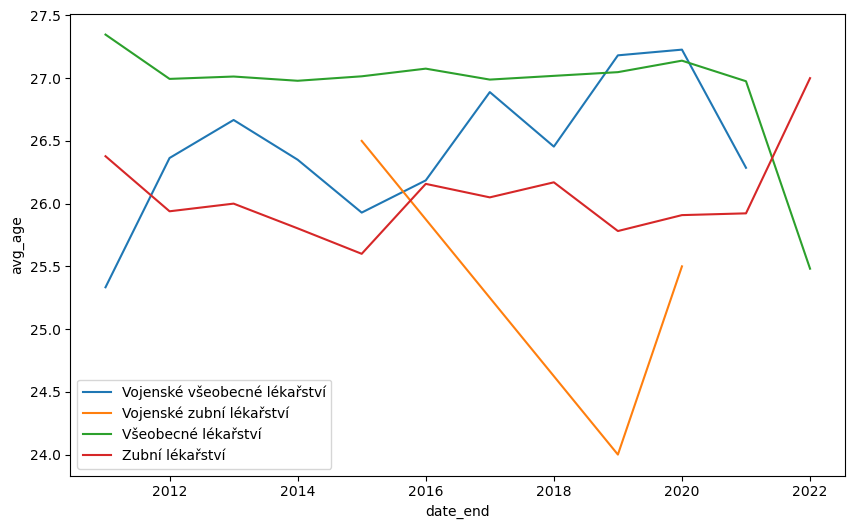

In [43]:

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,6))


x = relevant_df[relevant_df.graduated==True].groupby(['major', 'date_end']).mean()['age_end'].reset_index()

for major in x.major.unique():
    y = x[x.major == major]
    ax = y.plot(ax=ax, x='date_end', y='age_end',label=major)

plt.legend(loc='best')
plt.ylabel('avg_age')
plt.show()